In [2]:
# Make folder named data in root directory
import os 
os.makedirs('data', exist_ok=True)

In [3]:
# load the using google drive
# from google.colab import drive
# drive.mount('Drive')

# Download data using wget
!wget --header="Host: www.csc.kth.se" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" "https://www.csc.kth.se/cvap/actions/handclapping.zip" -c -O 'handclapping.zip'
!wget --header="Host: www.csc.kth.se" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" "https://www.csc.kth.se/cvap/actions/walking.zip" -c -O 'walking.zip'
!wget --header="Host: www.csc.kth.se" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" "https://www.csc.kth.se/cvap/actions/jogging.zip" -c -O 'jogging.zip'
!wget --header="Host: www.csc.kth.se" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" "https://www.csc.kth.se/cvap/actions/boxing.zip" -c -O 'boxing.zip'

--2020-11-12 08:44:30--  https://www.csc.kth.se/cvap/actions/handclapping.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.227.116
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.227.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘handclapping.zip’

handclapping.zip        [ <=>                ] 168.71M  6.16MB/s    in 31s     

2020-11-12 08:45:02 (5.45 MB/s) - ‘handclapping.zip’ saved [176901831]

--2020-11-12 08:45:02--  https://www.csc.kth.se/cvap/actions/walking.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.227.116
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.227.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘walking.zip’

walking.zip             [                <=> ] 231.21M  6.09MB/s    in 41s     

2020-11-12 08:45:45 (5.63 MB/s) - ‘walking.zip’ saved [242442411]

--2020-11-12 08:45:45--  https://www.

In [4]:
# Unzip dataset
!unzip -q boxing.zip -d '/content/data/boxing'
!unzip -q handclapping.zip -d '/content/data/handclapping'
!unzip -q  jogging.zip -d '/content/data/jogging'
!unzip -q  walking.zip -d '/content/data/walking'

In [5]:
# Clone the github repo and for reading the code you can go at my github repo
!git clone git@github.com:Garvit-32/Video-Classification.git
%cd /content/Video-Classification

Cloning into 'Video-Classification'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 40 (delta 21), reused 32 (delta 13), pack-reused 0
Unpacking objects: 100% (40/40), done.
/content/Video-Classification


In [6]:
# import and install the required packag
!pip install av
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
import av
import torchvision 
from torchvision import models,transforms
from torch.autograd import Variable
import sys
from tqdm.autonotebook import tqdm 
import torch.optim as optim 
import os 
from torch.utils.data import DataLoader,Dataset

     |████████████████████████████████| 36.9MB 87kB/s 


In [7]:
# import preprocess function from video_process.py
from video_process import preprocess_data

In [8]:
# prepocessing the video data and extract 16 frame from each video
data = '/content/data'
frame_path = '/content/frame'
res = '/content/dataset'
preprocess_data(data,frame_path,res,seq_length = 16)

Extract frame from /content/data/boxing


ac-tex damaged at 8 6
Error at MB: 74



Extract frame from /content/data/jogging



Extract frame from /content/data/handclapping



Extract frame from /content/data/walking



Extract required number of frame from /content/frame/boxing directory



Extract required number of frame from /content/frame/jogging directory



Extract required number of frame from /content/frame/handclapping directory



Extract required number of frame from /content/frame/walking directory


In [9]:
# param
im_size = 128
batch_size = 8

# import train loader for calcuate of mean and std
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor()])
train_data = torchvision.datasets.ImageFolder(root = '/content/dataset', transform = train_transforms)
train_loader =  DataLoader(train_data, batch_size = batch_size , shuffle = True)

In [10]:
# calculate mean and std by usind normalize_parameter function in utils.py

# from utils import normalization_parameter

# mean,std = normalization_parameter(train_loader)
# print(mean,std)
mean,std = np.array([0.5755, 0.5755, 0.5754]),np.array([0.0993, 0.0993, 0.0993])

In [11]:
# image transformation for train_data
train_transforms = transforms.Compose([
                                        transforms.Resize((im_size,im_size)),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(degrees=10),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

#inverse normalization for image plot

inv_normalize =  transforms.Normalize(
    mean=-1*np.divide(mean,std),
    std=1/std
)

Printing random data from dataset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

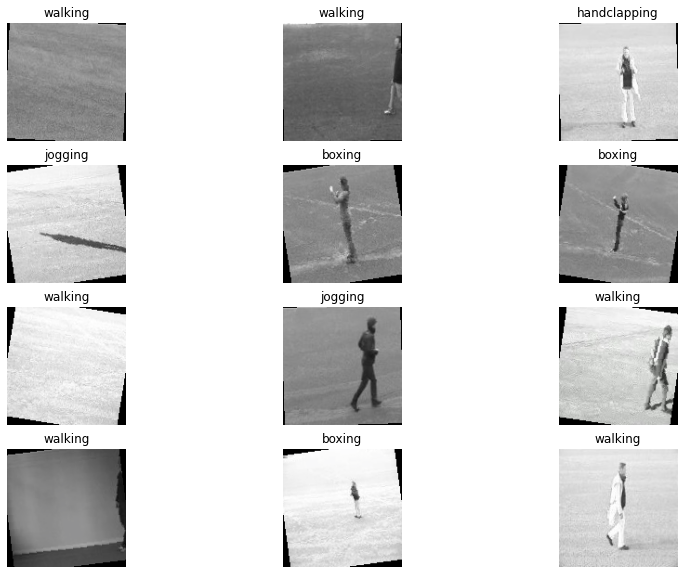

In [12]:
# load the train data using Imagefolder of torchvision
train_data = torchvision.datasets.ImageFolder(root='/content/dataset',transform=train_transforms)
classes = train_data.classes
# print(classes)

# import encoder and decoder for classes from utils 
from utils import encoder_decoder

encoder, decoder = encoder_decoder(classes)
# print(encoder,decoder)

# plot the image using class_plot function in utils.py
from utils import class_plot
class_plot(train_data,encoder,inv_normalize)

# loading the data using pytorch dataloader
train_loader = DataLoader(train_data,batch_size = batch_size,num_workers = 8 ,shuffle = True)

# save it in a dictionary
dataloaders = {'train':train_loader}

In [13]:
# import model from model.py i use resnet50 as backbone and few dense layer
!pip install torchsummary
from model import classifier
from torchsummary import summary

model = classifier(n_class=4,device='cuda',pretrained=True)

# show keras like model view
# summary(model,input_size=(3,128,128))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [17]:
device = 'cuda'

# use CrossEntropy as loss function and SGD as optimizer
criterion = nn.CrossEntropyLoss().to('cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum = 0.9,weight_decay = 1e-4)

# number of epoch 
num_epochs = 5 

In [19]:
# train the model

from torch.autograd import Variable
iteration = 0
acc_all = list()
loss_all = list()

for epoch in range(num_epochs):
    print('')
    print(f"--- Epoch {epoch+1} ---")
    phase1 = dataloaders.keys()
    for phase in phase1:
        print('')
        print(f"--- Phase {phase} ---")
        epoch_metrics = {"loss": [], "acc": []}
        for batch_i, (X, y) in enumerate(dataloaders[phase]):
            image = Variable(X.to(device), requires_grad=True)
            labels = Variable(y.to(device), requires_grad=False)
            optimizer.zero_grad()
            predictions = model(image)
            loss = criterion(predictions, labels)
            acc = 100 * (predictions.detach().argmax(1) == labels).cpu().numpy().mean()
            loss.backward()
            optimizer.step()
            epoch_metrics["loss"].append(loss.item())
            epoch_metrics["acc"].append(acc)
            sys.stdout.write(
                    "\r[Epoch %d/%d] [Batch %d/%d] [Loss: %f (%f), Acc: %.2f%% (%.2f%%)]"
                    % (
                        epoch+1,
                        num_epochs,
                        batch_i,
                        len(dataloaders[phase]),
                        loss.item(),
                        np.mean(epoch_metrics["loss"]),
                        acc,
                        np.mean(epoch_metrics["acc"]),
                    )
                )

                # Empty cache
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            
        print('')
        print('{} , acc: {}'.format(phase,np.mean(epoch_metrics["acc"])))
        torch.save(model.state_dict(),'/content/epoch_{}.h5'.format(epoch))
        if(phase=='train'):
          acc_all.append(np.mean(epoch_metrics["acc"]))
          loss_all.append(np.mean(epoch_metrics["loss"]))


--- Epoch 1 ---

--- Phase train ---
[Epoch 1/5] [Batch 797/798] [Loss: 0.504161 (0.411218), Acc: 75.00% (77.71%)]
train , acc: 77.70989974937343

--- Epoch 2 ---

--- Phase train ---
[Epoch 2/5] [Batch 797/798] [Loss: 0.457571 (0.366541), Acc: 75.00% (79.53%)]
train , acc: 79.52694235588973

--- Epoch 3 ---

--- Phase train ---
[Epoch 3/5] [Batch 797/798] [Loss: 0.458730 (0.327923), Acc: 62.50% (81.55%)]
train , acc: 81.54761904761905

--- Epoch 4 ---

--- Phase train ---
[Epoch 4/5] [Batch 797/798] [Loss: 0.227109 (0.320093), Acc: 87.50% (82.30%)]
train , acc: 82.29949874686717

--- Epoch 5 ---

--- Phase train ---
[Epoch 5/5] [Batch 797/798] [Loss: 0.365208 (0.295080), Acc: 75.00% (83.26%)]
train , acc: 83.25501253132832


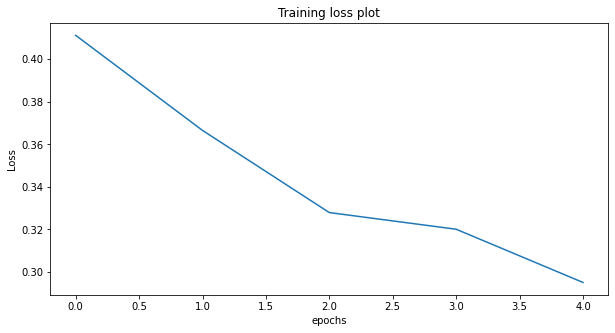

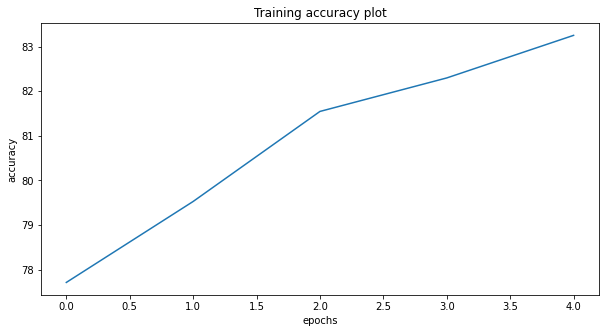

In [20]:
from utils import error_plot,acc_plot

error_plot(loss_all)
acc_plot(acc_all)

In [ ]:
# %cd '/content/'
# print(os.listdir('.'))

/content
['.config', 'boxing.zip', 'walking.zip', 'jogging.zip', 'handclapping.zip', 'dataset', 'data', 'Video-Classification', 'frame', 'sample_data']


In [ ]:
# import shutil 
# shutil.rmtree('/content/Video-Classification')
# # shutil.rmtree('/content/frame')
# # shutil.rmtree('/content/dataset')
